# Week3 Two-way ANOVA
## 背景描述
实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。
这是一个压力（因子A）水平数 $a=3$，温度（因子B）水平数 $b=3$ 和重复次数 $n=3$ 的双因子实验。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Glass_Type | 玻璃材料类型 | categorical variable | [1，2，3] |
| （自变量）Temperature |   温度   | continuous variable | [100, 125, 150] |
| （因变量）Light_Output | 输出光 | continuous variable | Real |

## 问题 
注：这里使用 $\alpha$=0.05 的显著性水平

1. 试判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图来检验设定模型的恰当性.
3. 选出一种玻璃类型，使得不论温度高低都能使示波器管的输出光较高.
4. 估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$
5. 如何对这种示波器管的输出光进行预测？

## 解决方案
**Q1:**  
检验行处理效应的等式假设:  $H_{01}:\tau_1=\tau_2=\cdots=\tau_a=0$  vs  $H_{11}:\tau_i \neq 0, \exists i$  
检验列处理效应的等式假设:  $H_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  $H_{12}:\beta_j \neq 0, \exists j$  
检验行与列处理没有交互作用假设:  $H_{03}:(\tau\beta)_{ij}=0, \forall i,j$  vs  $H_{13}:(\tau\beta)_{ij} \neq 0, \exists i,j$  
利用python进行分析的具体分析结果如下：

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

alpha = 0.05
a = 3
b = 3
n = 3

x = pd.read_csv('Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Glass_Type', 'Temperature', 'Light_Output'])
print(df.head())

# Do the two-way ANOVA
model = ols('Light_Output~ C(Glass_Type) + C(Temperature) + C(Glass_Type):C(Temperature)',df).fit()
anova_results = anova_lm(model)
print('\n双因素方差分析表：\n', anova_results)

if anova_results['PR(>F)'][2] < alpha:
    print('\nFor Glass_Type:Temperature, p-value: %f < 0.05, reject H03.'% anova_results['PR(>F)'][2])
else:
    print('\nFor material:Temperature, accept H03.')

if anova_results['PR(>F)'][0] < alpha:
    print('\nFor Glass_Type, p-value: %f < 0.05, reject H01.'% anova_results['PR(>F)'][0])
else:
    print('\nFor Glass_Type, accept H01.')

if anova_results['PR(>F)'][1] < alpha:
    print('\nFor Temperature, p-value: %f < 0.05, reject H02.'% anova_results['PR(>F)'][1])
else:
    print('\nFor Temperature, accept H02.')

   Glass_Type  Temperature  Light_Output
0           1          100           580
1           1          100           568
2           1          100           570
3           2          100           550
4           2          100           530

双因素方差分析表：
                                 df        sum_sq        mean_sq            F  \
C(Glass_Type)                  2.0  1.508645e+05   75432.259259   206.370554   
C(Temperature)                 2.0  1.970335e+06  985167.259259  2695.259499   
C(Glass_Type):C(Temperature)   4.0  2.905517e+05   72637.925926   198.725707   
Residual                      18.0  6.579333e+03     365.518519          NaN   

                                    PR(>F)  
C(Glass_Type)                 3.886026e-13  
C(Temperature)                5.008957e-23  
C(Glass_Type):C(Temperature)  1.254188e-14  
Residual                               NaN  

For Glass_Type:Temperature, p-value: 0.000000 < 0.05, reject H03.

For Glass_Type, p-value: 0.000000 < 0.05, reject

由上面的方差分析表可知，在$\alpha=0.05$的水平下：  
对玻璃材料类型来说，$p=0.0000<0.05$，所以玻璃材料类型对输出光有显著影响；  
对温度来说，$p=0.0000<0.05$，所以温度对输出光也具有显著影响；  
对玻璃材料类型和温度的交互因素来说，$p=0.0000<0.05$，所以交互因素对输出光也具有显著影响.

【多重比较】在双因子析因设计实验中，如果交互作用是显著的，一个因子（例如，因子 A）的均值间的比较可能由于交互作用而模糊不清。解决这类问题的方法是：将另一个因子（因子 B）固定在一特定水平上，在此水平上对因子 A 的均值使用 Tukey 检验法。  
由上面方差分析表可知，行均值、列均值和交互项均有显著性差异，所以下面我们进一步固定温度水平为 70℉，对 3 种材料进行多重比较，以Tukey的Honestly Significant Difference(HSD)检验法为例: 

固定温度水平为 125℉: 三种玻璃材料之间的多重比较: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -52.3333 0.0523 -105.2908  0.6241  False
     1      3 -32.6667  0.221  -85.6241 20.2908  False
     2      3  19.6667 0.5285  -33.2908 72.6241  False
------------------------------------------------------




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


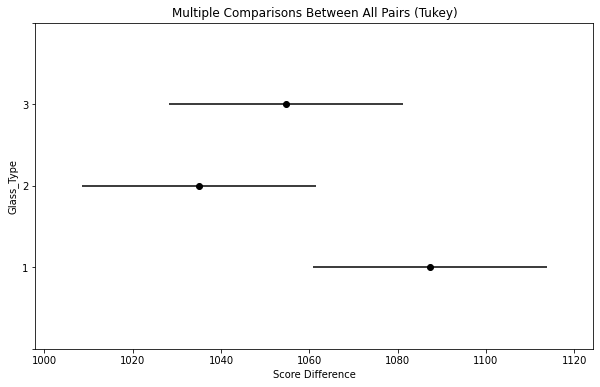

In [2]:
# 使用Tukey HSD 检验法进行多重比较
multiComp = MultiComparison(df.loc[df['Temperature'] == 125, 'Light_Output'], df.loc[df['Temperature'] == 125, 'Glass_Type'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 125℉: 三种玻璃材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Glass_Type', xlabel= 'Score Difference')
print('\n')

结果说明：  
这一分析表明，当温度水平为 125℉ 时，材料类型 1 与类型 3 ，材料类型 2 与类型 3 的输出光差异不显著，但材料类型 1 与类型 2 的输出光具有显著差异。

**Q2:**  
检验设定模型的恰当性：  
**残差分析0: 计算电池寿命数据的残差**

In [3]:
# 计算电池寿命数据的残差
list_temp = [100, 125, 150]
data_res = data.astype(float)
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i + 1) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
df = pd.DataFrame(data_res, columns = ['Glass_Type', 'Temperature', 'Light_Output'])
print(df)

    Glass_Type  Temperature  Light_Output
0          1.0        100.0      7.333333
1          1.0        100.0     -4.666667
2          1.0        100.0     -2.666667
3          2.0        100.0     -3.000000
4          2.0        100.0    -23.000000
5          2.0        100.0     26.000000
6          3.0        100.0    -27.333333
7          3.0        100.0      1.666667
8          3.0        100.0     25.666667
9          1.0        125.0      2.666667
10         1.0        125.0     -0.333333
11         1.0        125.0     -2.333333
12         2.0        125.0     35.000000
13         2.0        125.0      0.000000
14         2.0        125.0    -35.000000
15         3.0        125.0     -9.666667
16         3.0        125.0     -1.666667
17         3.0        125.0     11.333333
18         1.0        150.0      6.000000
19         1.0        150.0     -6.000000
20         1.0        150.0      0.000000
21         2.0        150.0     15.000000
22         2.0        150.0     -1

**残差分析1: 残差的正态概率图** 

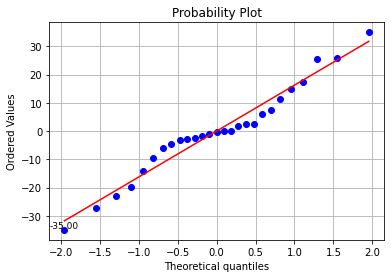

In [4]:
# 残差的正态概率图
res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

无特别的证据说明违背数据正态性；
异常值的检测：
$\frac{-35.000}{\sqrt{365.518}}=-1.83>-2$
不存在绝对值大于 2 的残差，判断不存在异常值。  
  
(计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。)

In [5]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal, 2))

if pVal > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

0.97
0.52

Accept the null hypothesis.


以上结果说明接受原假设，即残差具有正态性。

**残差分析2: 残差与预测值的关系图**  

Text(0, 0.5, 'e_ijk')

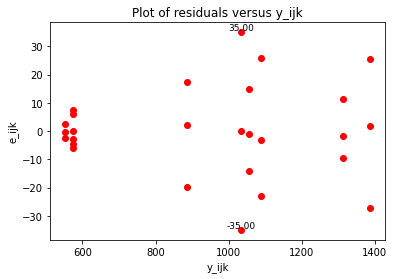

In [6]:
# 残差与预测值的关系图
y2 = []
for i in range(a):
    for j in list_temp:
        for k in range(n):
            y2.append(np.mean(data[(data[:,0] == i + 1) & (data[:,1] == j), 2]))
plt.scatter(y2, res, c = 'red')
plt.text(y2[12], res[12], '%.2f' % float(res[12]), ha='center', va= 'bottom', fontsize=9)
plt.text(y2[12], res[14], '%.2f' % float(res[14]), ha='center', va= 'bottom', fontsize=9)
plt.title('Plot of residuals versus y_ijk')
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')

由上图可以看出，当输出光很小时，残差方差同样较小。但当输出光增大时，残差方差不一定随之同样增大，而是在略大于1000的位置达到最大值。

**残差分析3：残差与材料的关系图**  

Text(0, 0.5, 'e_ijk')

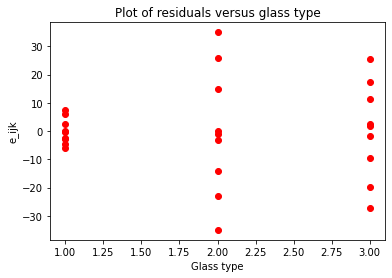

In [7]:
# 残差对材料种类的关系图
y3 = data_res[:,0]
plt.scatter(y3, res, c = 'red')
plt.title('Plot of residuals versus glass type')
plt.xlabel('Glass type')
plt.ylabel('e_ijk')

上图显示出方差较为明显的不等性：玻璃材料为第一种时，方差远小于另外两种。另外玻璃材料二的方差略大于玻璃材料三的方差。

**残差分析4：残差与温度的关系图**  

Text(0, 0.5, 'e_ijk')

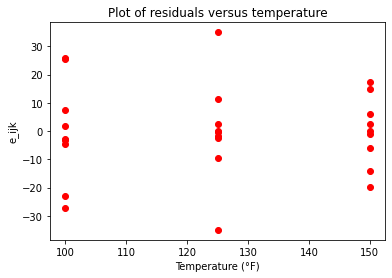

In [8]:
# 残差对温度的关系图
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'red')
plt.title('Plot of residuals versus temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

上图显示出方差微弱的不等性：温度为 125℉ 时，比其他情况下方差大。

在 125℉ 的温度-玻璃材料类型2 这一单元中，包含了两个极端残差值（-35.00 与 35.00）。这两个残差值对于后面三张图检验出的方差不等起了主要作用。在实际生产的过程中，需要重新审查这些数据，如并未显出任何明显的问题，比如记录错误等，则应把所有响应作为真实数据接收下来。本题目中认为所有数据均为真实数据。

**Q3:**  
为了选出一种材料，使得不论温度高低与否都能使电池有较长的寿命，我们进行固定效应模型分析。

   Glass_Type  Temperature  Light_Output
0         1.0        100.0    572.666667
1         1.0        100.0    572.666667
2         1.0        100.0    572.666667
3         2.0        100.0    553.000000
4         2.0        100.0    553.000000


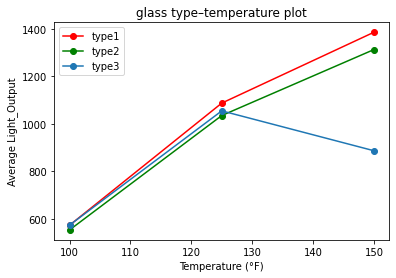

In [9]:
# 固定效应模型分析
data_avg = data.astype(float) * 1
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i + 1) & (data_avg[:,1] == j),2] = np.mean(cnt)
df = pd.DataFrame(data_avg, columns = ['Glass_Type', 'Temperature', 'Light_Output'])
print(df.head())

type1 = data_avg[[0,9,18], 2]
type2 = data_avg[[3,12,21], 2]
type3 = data_avg[[6,15,24], 2]
c1 = pd.Series(type1, index = list_temp, name = 'type1')
c2 = pd.Series(type2, index = list_temp, name = 'type2')
c3 = pd.Series(type3, index = list_temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'type3')
plt.title('glass type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Light_Output')
plt.legend(['type1', 'type2', 'type3'])

上图绘制了每一种处理组合的平均响应图，因为线段2和3不平行，所以交互作用显著。一般来说，不管是什么玻璃材料，在低温处的输出光都较低。随着温度升高，材料1和2的输出光随之增加。但当温度增加到150度时，输出光反而下降。总体上来看材料1的输出光无论在所有的温度下的输出光都是最高的。因此如果我们希望使输出光尽量高，玻璃材料类型 1 给出了最好的结果。 

**Q4:**  
估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$  
$\hat{\mu}=\bar{y}_{\cdots}$  
$\hat{\tau_i}=\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdots},\quad i = 1,2,\cdots,a$  
$\hat{\beta_j}=\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdots},\quad j = 1,2,\cdots,b$  
$\hat{\tau\beta}_{ij}=\bar{y}_{ij\cdot}-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdots},\quad i = 1,2,\cdots,a\quad j = 1,2,\cdots,b$

In [10]:
# 参数估计
mu = np.mean(data[:,2])
print('总平均效应：', round(mu, 2))

tau = []
for i in range(a):
    tau.append(np.mean(data[data[:,0] == i + 1, 2]) - mu)
print('材料因子的水平效应：\n', np.round(tau, 2))

beta = []
for j in list_temp:
    beta.append(np.mean(data[data[:,1] == j, 2]) - mu)
print('温度因子的水平效应：\n', np.round(beta, 2))

tau_beta = []
k = 0
for i in range(a):
    tau_beta.append([])
    for j in range(b):
        cnt = data_avg[0 + 3 * k, 2] - tau[i] - beta[j] + mu
        tau_beta[i].append(cnt)
    k += 3
print('两因子之间的交互作用效应：\n', np.round(tau_beta, 2))

总平均效应： 940.19
材料因子的水平效应：
 [  75.15   26.81 -101.96]
温度因子的水平效应：
 [-373.85  118.81  255.04]
两因子之间的交互作用效应：
 [[1811.56 1318.89 1182.67]
 [2374.56 1881.89 1745.67]
 [2802.   2309.33 2173.11]]


**Q5:**  
由于温度是定量的，而材料类型是定性的。再者，温度有 3 个水平。因此，我们可计算线性的和二次的温度效应，以便研究温度怎样影响电池寿命。  
这里我们画出响应曲线（response curve）可以得到响应变量与定量因子——温度的关系。一般地，线性回归方法可用于为实验数据拟合相应的模型。  
$Life = \beta_0+\beta_1A+\beta_2B_1+\beta_3B_2+\beta_4A^2+\beta_5AB_1+\beta_6AB_2+\beta_7A^2B_1+\beta_8A^2B_2$  
其中，分量 $A, A^2$ 分别表示温度因子的一次效应、二次效应，$B$ 表示材料类型因子的主效应。由于温度为低、中、高水平(15℉， 70℉ ， 125℉ )，对应的温度水平分别为 $A=-1，0，+1$。变量 $B[1]$ 和 $B[2]$ 被认为是示性变量（indicator variable），其定义为:  

|  | 1 | 2 | 3 |  
| :--------: | :--------: | :--------: | :---------: |  
| $B[1]$ |   1   |   0   |   -1   |  
| $B[2]$ |   0   |   1   |   -1   |

In [11]:
# 构造这 8 个变量
list_A = [100, 125, 150]
#list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]
A = data[:,1] * 1
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]
AA = [A[k] ** 2 for k in range(len(A))]
AB1 = [A[k] * B1[k] for k in range(len(A))]
AB2 = [A[k] * B2[k] for k in range(len(A))]
AAB1 = [AA[k] * B1[k] for k in range(len(A))]
AAB2 = [AA[k] * B2[k] for k in range(len(A))]
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Life'] = data[:,2]
print(df.head())

# 训练模型
model = ols('Life~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params
model.summary()

     A  B1  B2     AA  AB1  AB2   AAB1   AAB2  Life
0  100   1   0  10000  100    0  10000      0   580
1  100   1   0  10000  100    0  10000      0   568
2  100   1   0  10000  100    0  10000      0   570
3  100   0   1  10000    0  100      0  10000   550
4  100   0   1  10000    0  100      0  10000   530


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        21:21:01   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4968.7778    191.292    -25.975      0.000   -5370.666   -4566.889
A             83.8667      3.127     26.818      0.000      77.297      90.437
B1          1322.7778    270.527      4.890      0.000     754.421    1891.134
B2          1553.7778    270.527      5.744      0.000     985.421    2122.134
AA            -0.2852      0.012    -22.834      0.000      -0.311      -0.259
AB1          -24.4000      4.423     -5.517      0.000     -33.692     -15.108
AB2          -27.8667      4.423     -6.301      0.000     -37.158     -18.575
AAB1           0.1124      0.018      6.362      0.000       0.075       0.149
AAB2           0.1220      0.018      6.905      0.000       0.085       0.159
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

拟合曲线[-1, 1]： 

$Life = 1059+314.44 *A+28.33 *B[1]-24 *B[2]-178.22 *A^2+92.22 *AB[1]+65.56 *AB[2]+70.22 *A^2B[1]+76.22 *A^2B[2]$

拟合曲线[100, 150]： 

$Life = -4968.78+83.87 *A+1322.78 *B[1]+1553.78 *B[2]-0.29 *A^2-24.4 *AB[1]-27.87 *AB[2]+0.11 *A^2B[1]+0.12 *A^2B[2]$

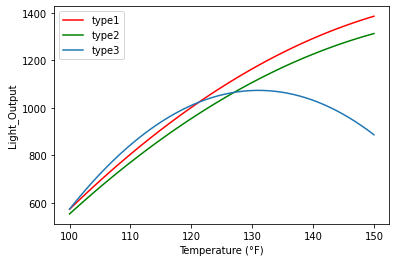

In [12]:
# 拟合响应曲线
temp = np.linspace(100,150)
#temp = np.linspace(-1, 1)
life_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
life_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
life_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(life_type1, index = temp, name = 'type1')
c2 = pd.Series(life_type2, index = temp, name = 'type2')
c3 = pd.Series(life_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light_Output')
plt.legend(['type1', 'type2', 'type3'])

拟合曲线[-1, 1]：

材料类型为 1：

$y = 1087.33 + 406.66 ∗ Temp - 108 ∗ Temp^2 $

材料类型为 2：

$y = 1035 + 380 ∗ Temp − 102.22 ∗ Temp^2 $

材料类型为 3：

$y = 1054.67 + 156.66 ∗ Temp − 324.66 ∗ Temp^2 $

拟合曲线[100, 150]：

材料类型为 1：

$y = -3646 + 59.47 ∗ Temp - 0.18 ∗ Temp^2 $

材料类型为 2：

$y = -3415 + 56 ∗ Temp − 0.17 ∗ Temp^2 $

材料类型为 3：

$y = -7845.34 + 136.14 ∗ Temp − 0.52 ∗ Temp^2 $

上图显示了这 3 个预测公式生成的响应曲线。 